# <h1>Scrapping Twitter</h1>



*   **Instal Library Snscrape**



In [31]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Fungsi : Untuk mengambil data pada jejaring sosial, seperti profil, tagar, atau pencarian pengguna dan mengembalikan item yang ditemukan.



*   **Instal Library Langdetect**



In [32]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Fungsi : untuk mendeteksi bahasa dan mengubahnya supaya bisa dipahami  oleh phyton. Menghasilkan data text dan mengembalikannya ke dalam list tuples sesuai dengan max_num 

In [33]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect



*   **Deklarasi syntax, kemudian masukan ke dalam "datatw"**


In [34]:
keywords=['Jakarta Marathon']
start="2022–10–15"
end ="2022–10–17"
max_num=99
fname='tweet.json' 
languages=['id','en']

In [35]:
import pandas as pd
datatw=[]

In [36]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
            
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                #print(line)
                f.write(line)
                f.write('\n')

In [37]:
datatw

['Odekta Ratu Marathon Indonesia Lahir di Event Dunia Jakarta\xa0Marathon https://t.co/BahwVS3Arj',
 'Curi Perhatian, 5 Gaya Centil Nia Ramadhani di Jakarta Marathon - https://t.co/PKCQ1FhBJb https://t.co/6eBtBII7Qp',
 'Semoga tahun depan #jakartamarathon lebih baik lagi 🤙🏻 https://t.co/onUF9xKAab',
 'bagaimana sih cara melihat official time resultnya @JakartaMarathon ?',
 'Tak hanya Kia EV6 GT-line, Kia juga menghadirkan Kia Niro EV di event internasional ini sebagai Race Clock Car untuk menjaga udara tetap segar dan bebas emisi 😍\n\nKia Indomobil\n\n#JakartaMarathon2022 #JakartaMarathon #Jakarta #Marathon #MovementThatInspires',
 'Menjadi suatu kebanggaan, Kia dapat mendukung event internasional Jakarta Marathon 2022 😊 https://t.co/HSs3zcQTbh',
 'Jakarta (Marathon) memang brutal, tapi tetaplah berusaha menyebarkan cinta dan kasih sayang. #JakartaMarathon2022 https://t.co/ToCo8qLp9p',
 'Menggelar Jakarta Marathon Pascapandemi, Apa Saja\xa0Tantangannya? https://t.co/KYIOnCdWJa',
 'Pela



*   **Cetak datatw yang belum di lakukan proses klastering menjadi csv file**

In [38]:
import pandas as pd
SebelumKlaster = pd.DataFrame(datatw)
SebelumKlaster.to_csv('Data_Sebelum_diklastering.csv', index = False)



*   **Instal Library Sastrawi**


In [39]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Fungsi : mengubah kata berimbuhan bahasa Indonesia menjadi bentuk dasarnya



*   **melakukan proses stemming, penghilangan stopword (proses filtering), dan penghilangan karakter yang tidak bermakna**



In [40]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process

# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

documents_clean=[]

for d in datatw:
  
  # Start Case Folding

  # Remove Unicode
  document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
  # Remove URL
  document_test = re.sub(r'http\S+', '', document_test)
  # Remove Mentions
  document_test = re.sub(r'@\w+', '', document_test)
  # Lowercase the document
  document_test = document_test.lower()
  # Remove punctuations
  document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
  # Remove the numbers
  document_test = re.sub(r'[0-9]', '', document_test)
  # Remove the doubled space
  outputcase = re.sub(r'\s{2,}', ' ', document_test)
    
  # End Case Folding
    
  # Proses Stemming
  outputstem= stemmer.stem(outputcase)

  # Proses Filtering (StopwordRemover)
  outputstop = stopword.remove(outputstem)

  documents_clean.append(outputstop)

In [41]:
documents_clean[0:10]

['odekta ratu marathon indonesia lahir event dunia jakarta marathon',
 'curi perhati gaya centil nia ramadhani jakarta marathon',
 'moga tahun depan jakartamarathon lebih baik',
 'bagaimana sih cara lihat official time resultnya',
 'tak kia ev gt line kia hadir kia niro ev event internasional bagai race clock car jaga udara tetap segar bebas emisi kia indomobil jakartamarathon jakartamarathon jakarta marathon movementthatinspires',
 'jadi suatu bangga kia dukung event internasional jakarta marathon',
 'jakarta marathon memang brutal tetap usaha sebar cinta kasih sayang jakartamarathon',
 'gelar jakarta marathon pascapandemi apa tantang',
 'laksana jakarta marathon jakmar telah selesai deret catat khusus beberapa kurang akibat minim dana jakartamarathon',
 'odekta naibaho jadi cepat jakarta marathon bolaskorcom jakartamarathon marathon atletik']

In [42]:
import pandas as pd
SesudahClean = pd.DataFrame(documents_clean)
SesudahClean.to_csv('Data_yang_dapat_terbaca_di_Python.csv', index = False)



*   **Melakukan proses tf-idf**



In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()

Fungsi : untuk mencari makna kalimat yang terdiri dari kata-kata dan menghilangkan ketidakmampuan teknik **Bag of Words** (metode sederhana, hanya menghitung frekuensi kemunculan kata pada seluruh dokumen.) yang baik untuk klasifikasi teks maupun untuk membantu mesin membaca kata dalam angka



*   **Menampilkan Diagram Batang**

Text(0.5, 1.0, 'Kata-Kata yang Sering Muncul - Top 20')

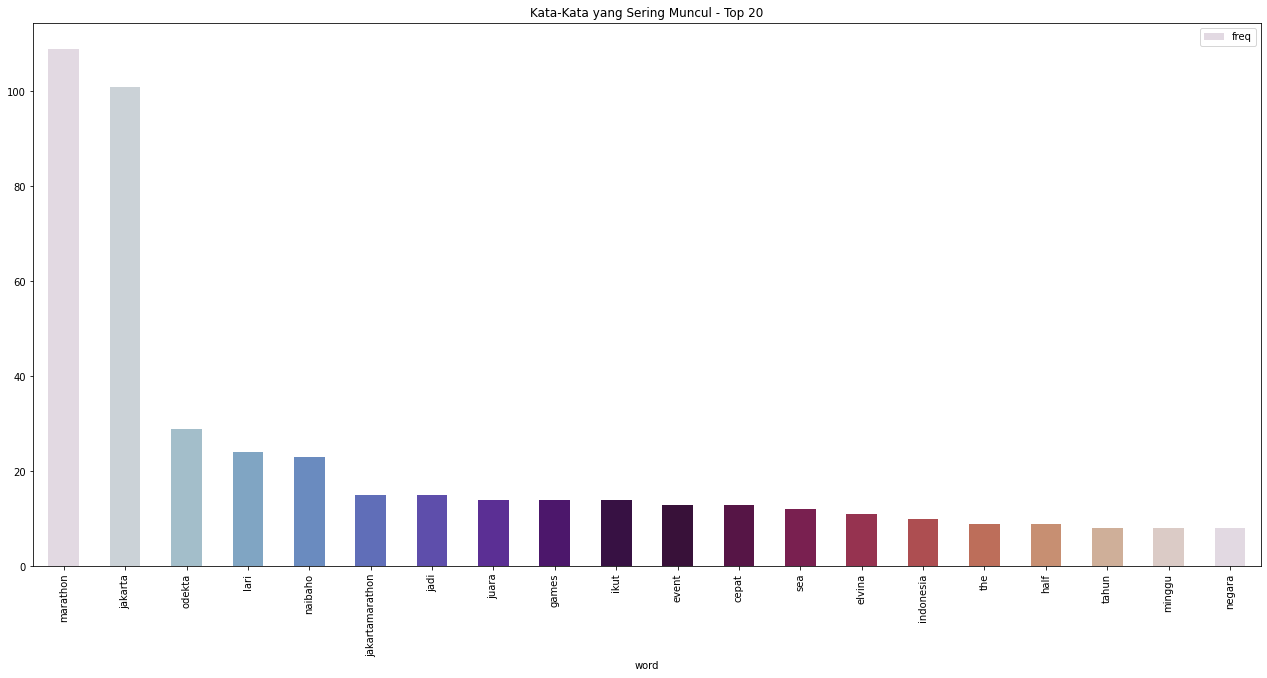

In [44]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(22, 10), color = color)
plt.title("Kata-Kata yang Sering Muncul - Top 20")



*   <h2><b>Proses Klastering</b></h2>




*   **Metode K-Means**

pada metode ini, dokumen akan dikelompokan setiap clusternya. Jadi konsepnya itu setiap label/kelompok data belum ditentukan di awal. Penentuan pengelompokan clusteringnya berdasarkan jarak terdekat terhadap Centroidnya (titik pusat). Menghitung centroid bisa menggunakan Rumus Euclidean Distance, kemudian setiap perubahan nilai centroid maka centroid yang akan bergerak ke titik pusat masing-masing datanya membentuk cluster-cluster baru.

In [45]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [46]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 games
 vietnam
 odekta
 medali
 marathon
 sea
 raih
 minggu
 emas
 elvina
Cluster 1:
 marathon
 jakarta
 odekta
 naibaho
 cepat
 jadi
 juara
 games
 elvina
 half
Cluster 2:
 jakarta
 marathon
 lari
 ikut
 event
 jakartamarathon
 negara
 tahun
 km
 warga




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)




*   **Menampilkan Dendogram dengan Metode Single Linkage**

prosedur ini didasarkan pada jarak terkecil. Jika dua obyek terpisah oleh jarak yang pendek maka kedua obyek tersebut akan digabung menjadi satu cluster daan demikian saterusnya.

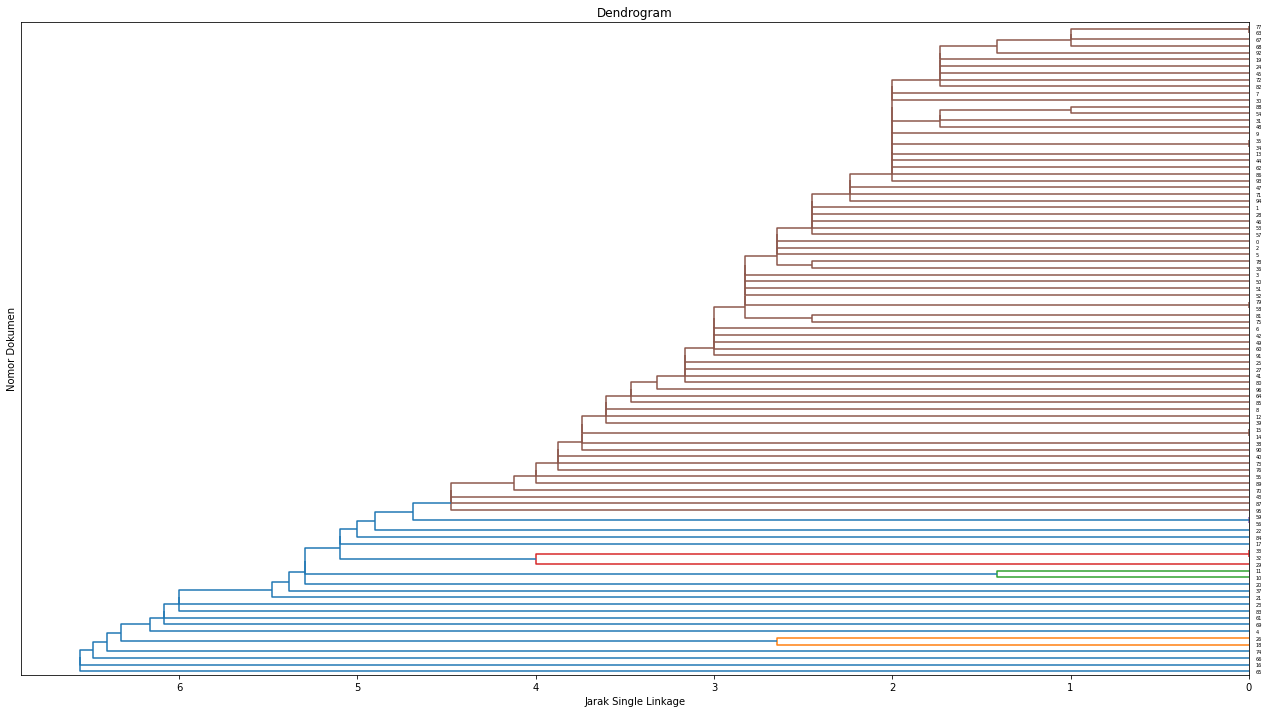

In [47]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
plt.figure(figsize=(22,12))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single',metric='euclidean'),orientation="left")
plt.title('Dendrogram')
plt.xlabel('Jarak Single Linkage')
plt.ylabel('Nomor Dokumen')
plt.show()

*   **Menampilkan Dendogram dengan Metode Ward**

Metode Ward bertujuan untuk memperoleh cluster yang memiliki varians internal cluster yang sekecil mungkin. Metode ini menggunakan Error sums of squares (ESS) dalam kelompok sebagai ukuran homogenitas. Jadi jarak antara dua cluster dalam metode ini berdasarkan total sum of square dua cluster pada masing-masing variabel. 


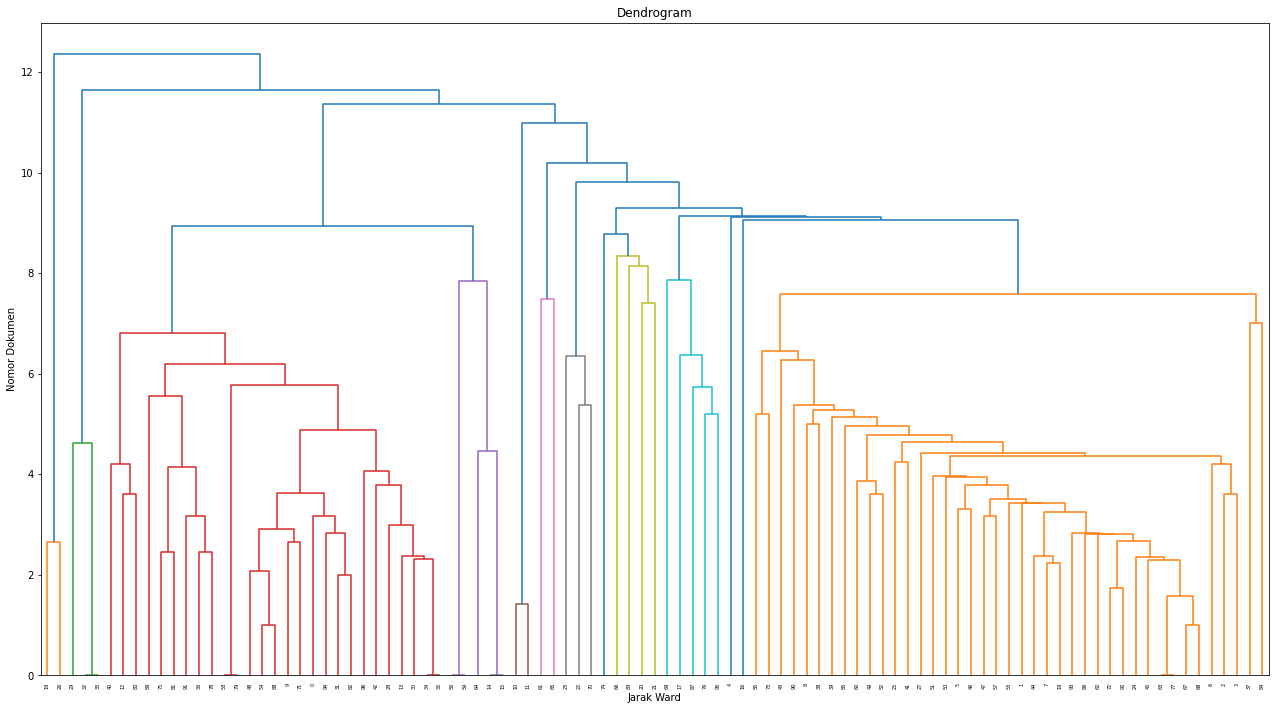

In [48]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
plt.figure(figsize=(22,12))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()



*   **Menampilkan Dendogram dengan Metode Average**

prosedure ini hampir sama dengan Single Linkage, namun kriteria yang digunakan adalah rata-rata jarak seluruh individu dalam suatu cluster dengan jarak seluruh individu dalam cluster yang lain.

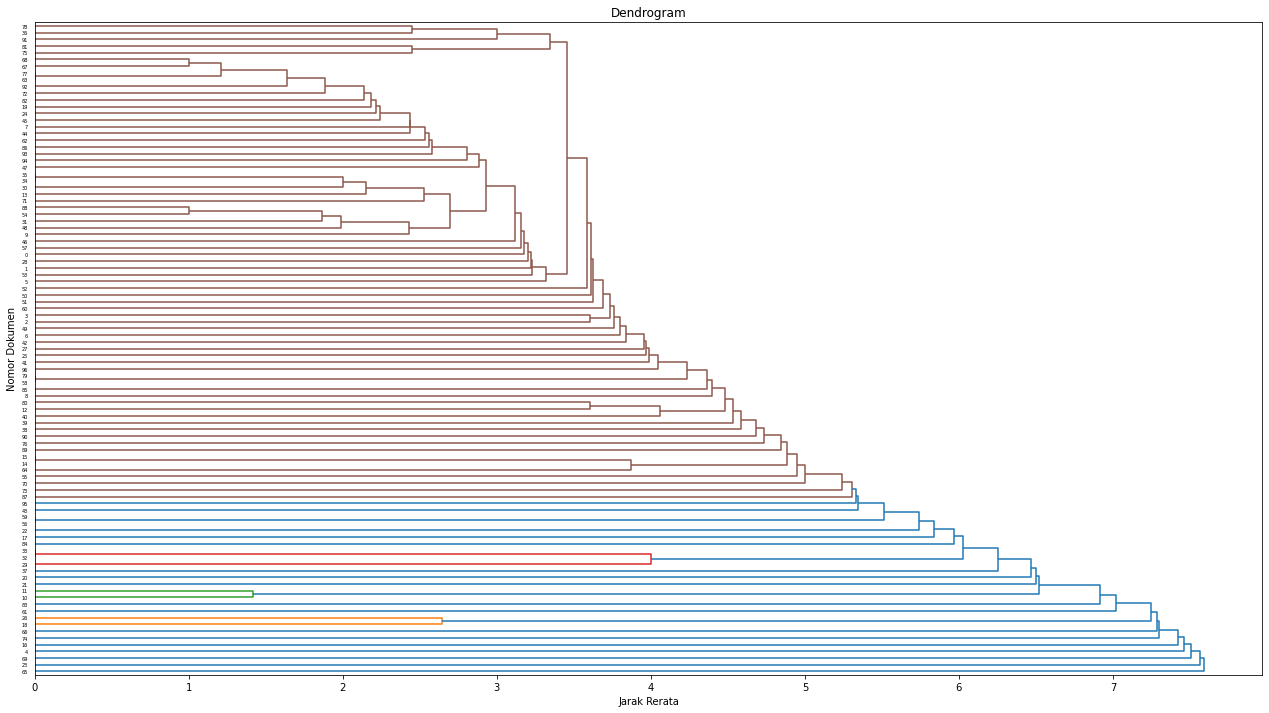

In [49]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
plt.figure(figsize=(22,12))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()